In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
wv = np.load('results_params/wavelet_ssim_1000f.npy', allow_pickle=True).flatten()
wv_params = np.load('results_params/wavelet_ssim_1000f_H.npy', allow_pickle=True).flatten()
for dict, res in zip(wv_params.flatten(), wv.flatten()):
    dict['ssim'] = res
df_wv = pd.json_normalize(wv_params)

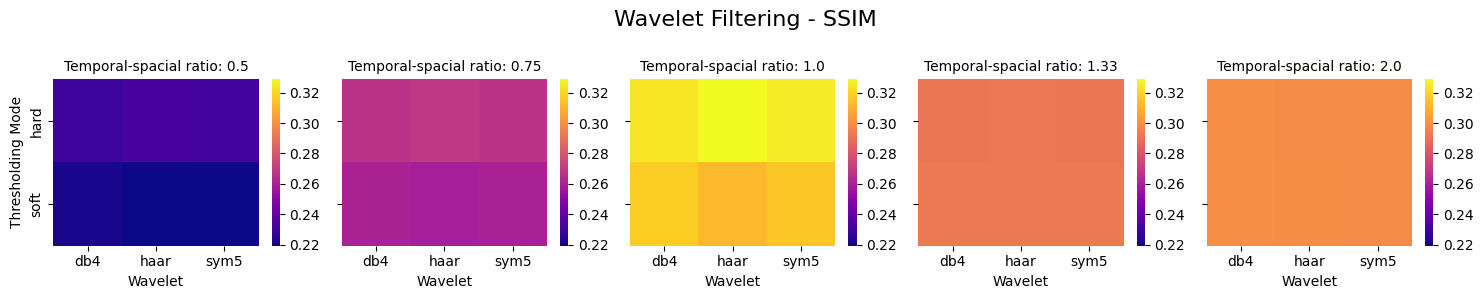

In [85]:
g = sns.FacetGrid(df_wv, col="spacing_ratio", col_wrap=5, height=3, aspect=1)
def draw_heatmap(data, **kwargs):
    pivot = data.pivot(index="mode", columns="wavelet", values="ssim")
    sns.heatmap(pivot, cmap="plasma", vmin=df_wv['ssim'].min(), vmax=df_wv['ssim'].max(), cbar=True, **kwargs)
g.map_dataframe(draw_heatmap)
g.set_titles(col_template="Temporal-spacial ratio: {col_name}")
g.set_axis_labels("Wavelet", "Thresholding Mode")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Wavelet Filtering - SSIM", fontsize=16, x = 0.5)
plt.show()

In [83]:
tv1 = np.load('results_params/tv_ssim_1000f_sr1.npy', allow_pickle=True).flatten()
tv2 = np.load('results_params/tv_ssim_1000f_sr2.npy', allow_pickle=True).flatten()
tv3 = np.load('results_params/tv_ssim_1000f_sr3.npy', allow_pickle=True).flatten()
tv_params1 = np.load('results_params/tv_ssim_1000f_sr1_H.npy', allow_pickle=True).flatten()
tv_params2 = np.load('results_params/tv_ssim_1000f_sr2_H.npy', allow_pickle=True).flatten()
tv_params3 = np.load('results_params/tv_ssim_1000f_sr3_H.npy', allow_pickle=True).flatten()
tv = np.concatenate([tv1, tv2, tv3])
tv_params = np.concatenate([tv_params1, tv_params2, tv_params3])
for dict, res in zip(tv_params.flatten(), tv.flatten()):
    dict['ssim'] = res
df_tv = pd.json_normalize(tv_params)

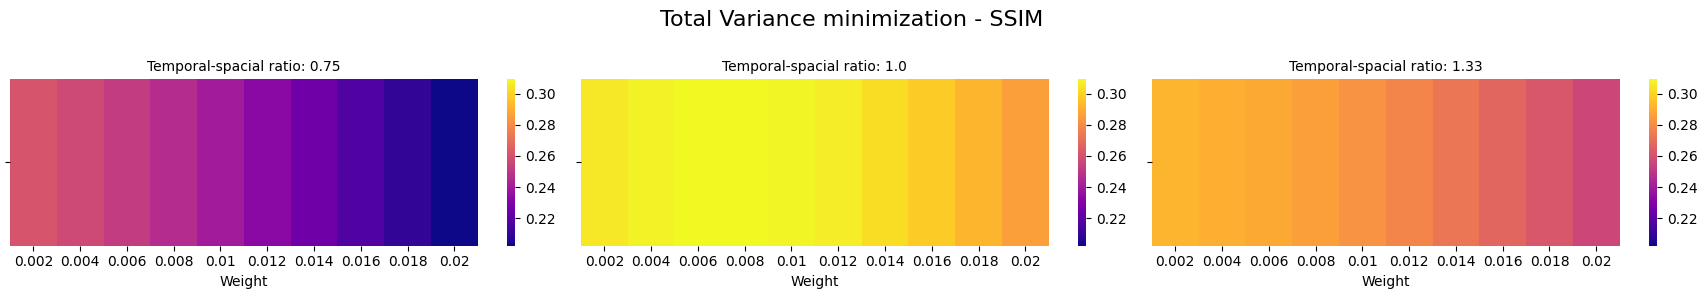

In [103]:
g = sns.FacetGrid(df_tv, col="spacing_ratio", col_wrap=3, height=3, aspect=2)
def draw_heatmap(data, **kwargs):
    pivot = data.pivot(index="spacing_ratio", columns="weight", values="ssim")
    sns.heatmap(pivot, cmap="plasma", vmin=df_tv['ssim'].min(), vmax=df_tv['ssim'].max(), cbar=True, **kwargs)
g.map_dataframe(draw_heatmap)
g.set_titles(col_template="Temporal-spacial ratio: {col_name}")
g.set_axis_labels("Weight", "")
g.set_yticklabels([""])
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Total Variance minimization - SSIM", fontsize=16)
plt.show()

In [101]:
gauss = np.load('results_params/WIN_gaussian_ssim_1000f.npy', allow_pickle=True).flatten()
gauss_params = np.load('results_params/WIN_gaussian_ssim_1000f_H.npy', allow_pickle=True).flatten()
for dict, res in zip(gauss_params.flatten(), gauss.flatten()):
    dict['ssim'] = res
df_gauss = pd.json_normalize(gauss_params)

In [102]:
df_gauss

,kernel_size,sigma_xy,sigma_t,ssim
0,5,0.2,0.2,0.284907
1,5,0.5,0.2,0.275109
2,5,0.8,0.2,0.224503
3,5,0.2,0.6,0.308101
4,5,0.5,0.6,0.286251
5,5,0.8,0.6,0.228320
6,5,0.2,1.0,0.319467
7,5,0.5,1.0,0.291541
8,5,0.8,1.0,0.230506
9,5,0.2,1.4,0.322877


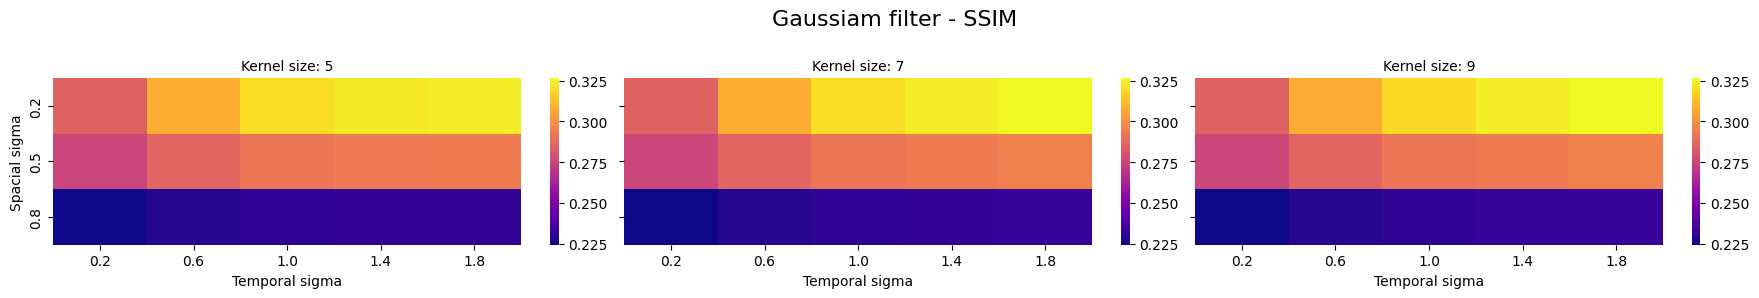

In [107]:
g = sns.FacetGrid(df_gauss, col="kernel_size", col_wrap=3, height=3, aspect=2)
def draw_heatmap(data, **kwargs):
    pivot = data.pivot(index="sigma_xy", columns="sigma_t", values="ssim")
    sns.heatmap(pivot, cmap="plasma", vmin=df_gauss['ssim'].min(), vmax=df_gauss['ssim'].max(), cbar=True, **kwargs)
g.map_dataframe(draw_heatmap)
g.set_titles(col_template="Kernel size: {col_name}")
g.set_axis_labels("Temporal sigma", "Spacial sigma")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Gaussiam filter - SSIM", fontsize=16)
plt.show()

In [108]:
anisotropic1 = np.load('results_params/anisotropic_ssim_1000f_sr1.npy', allow_pickle=True).flatten()
anisotropic2 = np.load('results_params/anisotropic_ssim_1000f_sr2.npy', allow_pickle=True).flatten()
anisotropic3 = np.load('results_params/WIN_anisotropic_ssim_1000f_sr3.npy', allow_pickle=True).flatten()
anisotropic_params1 = np.load('results_params/anisotropic_ssim_1000f_sr1_H.npy', allow_pickle=True).flatten()
anisotropic_params2 = np.load('results_params/anisotropic_ssim_1000f_sr2_H.npy', allow_pickle=True).flatten()
anisotropic_params3 = np.load('results_params/WIN_anisotropic_ssim_1000f_sr3_H.npy', allow_pickle=True).flatten()
anisotropic = np.concatenate([anisotropic1, anisotropic2, anisotropic3])
anisotropic_params = np.concatenate([anisotropic_params1, anisotropic_params2, anisotropic_params3])
for dict, res in zip(anisotropic_params.flatten(), anisotropic.flatten()):
    dict['ssim'] = res
df_anisotropic = pd.json_normalize(anisotropic_params)

In [109]:
df_anisotropic

,niter,kappa,gamma,spacing_ratio,ssim
0,3,0.02,0.03,0.75,0.264625
1,6,0.02,0.03,0.75,0.264619
2,9,0.02,0.03,0.75,0.264585
3,12,0.02,0.03,0.75,0.264525
4,15,0.02,0.03,0.75,0.264440
...,...,...,...,...,...
205,9,0.14,0.06,1.33,0.217538
206,12,0.14,0.06,1.33,0.200821
207,15,0.14,0.06,1.33,0.186510
208,18,0.14,0.06,1.33,0.174190


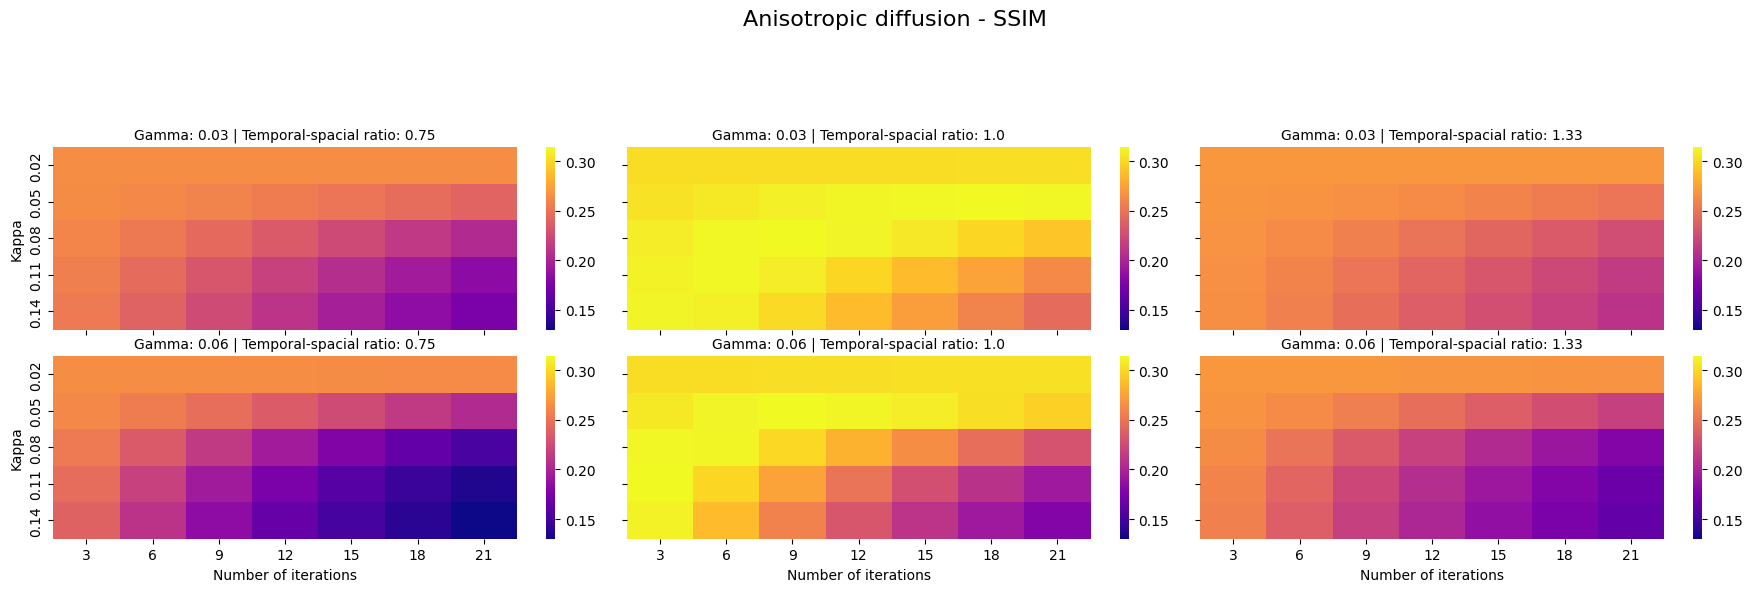

In [111]:
g = sns.FacetGrid(df_anisotropic, row="gamma", col="spacing_ratio", height=3, aspect=2)
def draw_heatmap(data, **kwargs):
    pivot = data.pivot(index="kappa", columns="niter", values="ssim")
    sns.heatmap(pivot, cmap="plasma", vmin=df_anisotropic['ssim'].min(), vmax=df_anisotropic['ssim'].max(), cbar=True, **kwargs)
g.map_dataframe(draw_heatmap)
g.set_titles(row_template="Gamma: {row_name}", col_template="Temporal-spacial ratio: {col_name}")
g.set_axis_labels("Number of iterations", "Kappa")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Anisotropic diffusion - SSIM", fontsize=16)
plt.show()

In [4]:
bilateral = np.load('results_params/bi_ssim_100f.npy', allow_pickle=True).flatten()
bilateral_params = np.load('results_params/bi_ssim_100f_H.npy', allow_pickle=True).flatten()
for dict, res in zip(bilateral_params.flatten(), bilateral.flatten()):
    dict['ssim'] = res
df_bilateral = pd.json_normalize(bilateral_params)

In [5]:
df_bilateral

,kernel_size,sigma_xy,sigma_t,sigma_intensity,ssim
0,5,0.2,1.4,0.5,0.321762
1,5,0.5,1.4,0.5,0.293347
2,5,0.2,1.8,0.5,0.322887
3,5,0.5,1.8,0.5,0.293884
4,5,0.2,1.4,1.0,0.321842
5,5,0.5,1.4,1.0,0.292678
6,5,0.2,1.8,1.0,0.322943
7,5,0.5,1.8,1.0,0.293204
8,5,0.2,1.4,1.5,0.321856
9,5,0.5,1.4,1.5,0.292550


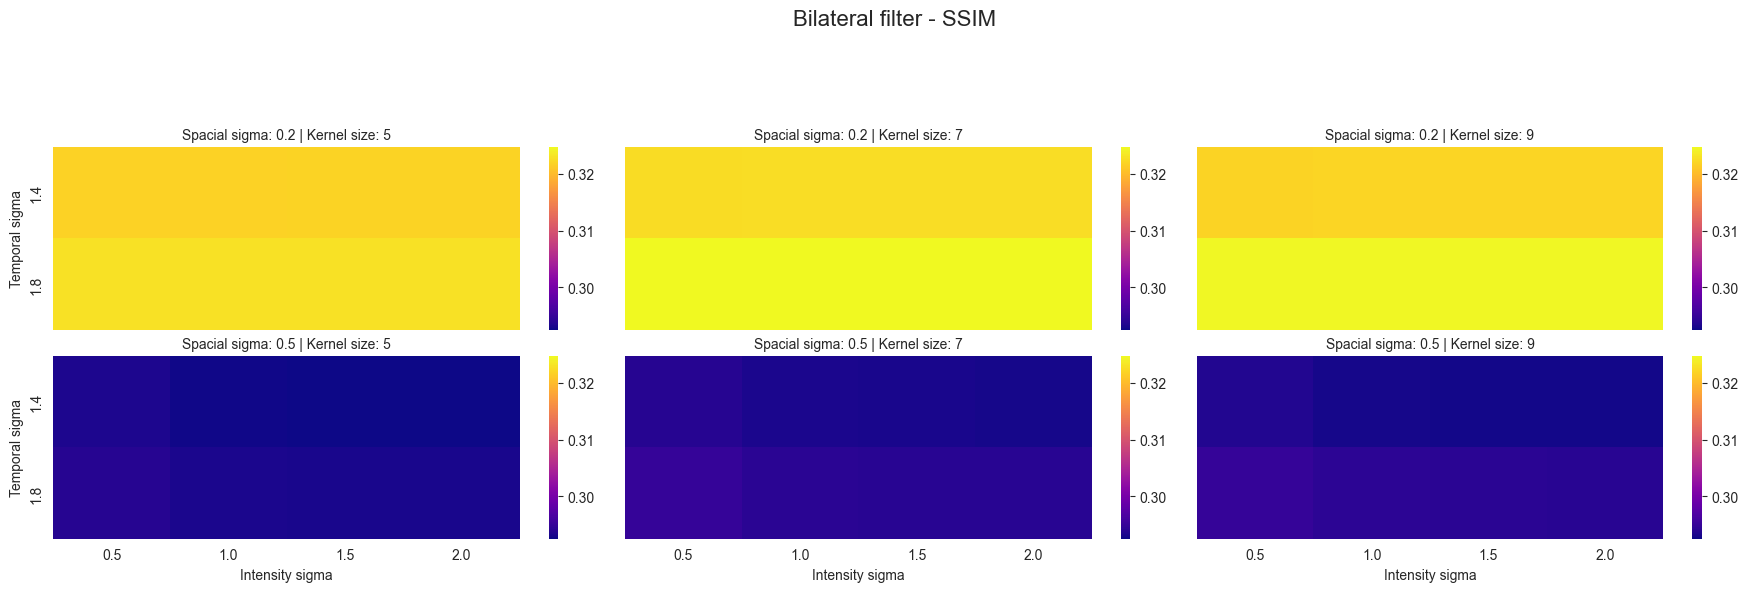

In [6]:
g = sns.FacetGrid(df_bilateral, row="sigma_xy", col="kernel_size", height=3, aspect=2)
def draw_heatmap(data, **kwargs):
    pivot = data.pivot(index="sigma_t", columns="sigma_intensity", values="ssim")
    sns.heatmap(pivot, cmap="plasma", vmin=df_bilateral['ssim'].min(), vmax=df_bilateral['ssim'].max(), cbar=True, **kwargs)
g.map_dataframe(draw_heatmap)
g.set_titles(row_template="Spacial sigma: {row_name}", col_template="Kernel size: {col_name}")
g.set_axis_labels("Intensity sigma", "Temporal sigma")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Bilateral filter - SSIM", fontsize=16)
plt.show()